<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week6.do.txt --no_mako -->
<!-- dom:TITLE: Advanced machine learning and data analysis for the physical sciences -->

# Advanced machine learning and data analysis for the physical sciences
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway

Date: **February 26, 2026**

## Plans for the week February 23-27, 2026

1. Intro to and mathematics of  Recurrent Neural Networks (RNNs)
<!-- o More material will be added -->
<!-- o "Video of lecture":"" -->
<!-- o [Whiteboard notes](https://github.com/CompPhysics/AdvancedMachineLearning/blob/main/doc/HandwrittenNotes/2026/Lectureweek6.pdf) -->

## Reading recommendations

1. For RNNs, see Goodfellow et al chapter 10, see <https://www.deeplearningbook.org/contents/rnn.html>.

2. Reading suggestions for implementation of RNNs in PyTorch: see Rashcka et al.'s chapter 15 and GitHub site at <https://github.com/rasbt/machine-learning-book/tree/main/ch15>.

## TensorFlow examples
For TensorFlow (using Keras) implementations, we recommend
1. David Foster, Generative Deep Learning with TensorFlow, see chapter 5 at <https://www.oreilly.com/library/view/generative-deep-learning/9781098134174/ch05.html>

2. Joseph Babcock and Raghav Bali Generative AI with Python and their GitHub link, chapters 2 and  3 at <https://github.com/PacktPublishing/Hands-On-Generative-AI-with-Python-and-TensorFlow-2>

## From NNs and CNNs to recurrent neural networks (RNNs)

There are limitation of NNs, one of which being that FFNNs are not
designed to handle sequential data (data for which the order matters)
effectively because they lack the capabilities of storing information
about previous inputs; each input is being treated indepen-
dently. This is a limitation when dealing with sequential data where
past information can be vital to correctly process current and future
inputs.

## What is a recurrent NN?

A recurrent neural network (RNN), as opposed to a regular fully
connected neural network (FCNN) or just neural network (NN), has
layers that are connected to themselves.

In an FCNN there are no connections between nodes in a single
layer. For instance, $(h_1^1$ is not connected to $(h_2^1$. In
addition, the input and output are always of a fixed length.

In an RNN, however, this is no longer the case. Nodes in the hidden
layers are connected to themselves.

## Why RNNs?

Recurrent neural networks work very well when working with
sequential data, that is data where the order matters. In a regular
fully connected network, the order of input doesn't really matter.

Another property of  RNNs is that they can handle variable input
and output. Consider again the simplified breast cancer dataset. If you
have trained a regular FCNN on the dataset with the two features, it
makes no sense to suddenly add a third feature. The network would not
know what to do with it, and would reject such inputs with three
features (or any other number of features that isn't two, for that
matter).

## Feedback connections

In contrast to NNs, recurrent networks introduce feedback
connections, meaning the information is allowed to be carried to
subsequent nodes across different time steps. These cyclic or feedback
connections have the objective of providing the network with some kind
of memory, making RNNs particularly suited for time- series data,
natural language processing, speech recognition, and several other
problems for which the order of the data is crucial.  The RNN
architectures vary greatly in how they manage information flow and
memory in the network.

## Vanishing gradients

Different architectures often aim at improving
some sub-optimal characteristics of the network. The simplest form of
recurrent network, commonly called simple or vanilla RNN, for example,
is known to suffer from the problem of vanishing gradients. This
problem arises due to the nature of backpropagation in time. Gradients
of the cost/loss function may get exponentially small (or large) if
there are many layers in the network, which is the case of RNN when
the sequence gets long.

## Recurrent neural networks (RNNs): Overarching view

Till now our focus has been, including convolutional neural networks
as well, on feedforward neural networks. The output or the activations
flow only in one direction, from the input layer to the output layer.

A recurrent neural network (RNN) looks very much like a feedforward
neural network, except that it also has connections pointing
backward. 

RNNs are used to analyze time series data such as stock prices, and
tell you when to buy or sell. In autonomous driving systems, they can
anticipate car trajectories and help avoid accidents. More generally,
they can work on sequences of arbitrary lengths, rather than on
fixed-sized inputs like all the nets we have discussed so far. For
example, they can take sentences, documents, or audio samples as
input, making them extremely useful for natural language processing
systems such as automatic translation and speech-to-text.

## Sequential data only?

An important issue is that in many deep learning methods we assume
that the input and output data can be treated as independent and
identically distributed, normally abbreviated to **iid**.
This means that the data we use can be seen as mutually independent.

This is however not the case for most data sets used in RNNs since we
are dealing with sequences of data with strong inter-dependencies.
This applies in particular to time series, which are sequential by
contruction.

## Differential equations

As an example, the solutions of ordinary differential equations can be
represented as a time series, similarly, how stock prices evolve as
function of time is another example of a typical time series, or voice
records and many other examples.

Not all sequential data may however have a time stamp, texts being a
typical example thereof, or DNA sequences.

The main focus here is on data that can be structured either as time
series or as ordered series of data.  We will not focus on for example
natural language processing or similar data sets.

## A simple regression example using Pytorch

The structure of the code here is as follows
1. Generate a sine function  and splits it into training and validation sets

2. Create a custom data set for sequence generation

3. Define an RNN model with one RNN layer and a final plain linear layer

4. Train the model using the mean-squared error as cost function and the Adam optimizer

5. Generate predictions using recursive forecasting

6. Plot the results and training/validation loss curves

The model takes sequences of previous values to predict the next
value of the sine function. The recursive prediction uses the model's own
predictions to generate future values, showing how well it maintains
the sine wave pattern over time.

The final plots show the the predicted values vs. the actual sine wave for the validation period
and the training and validation cost function curves to monitor for overfitting.

Here we create a dataset for the sine function.

In [1]:
# Sine wave with noise
t = linspace(0, 10π, 1000 points)
y = sin(t) + noise

# Creates sequences:
Input: 50 time steps → Output: 1 future step
Total sequences: 949
Train: 711 (75%)
Test: 238 (25%)

The code we have implemented is given here.

Using device: cpu

GENERATING OSCILLATORY DATA

Data generated:
  Function: sine wave
  Points: 1000
  Time range: [0.00, 31.42]
  Value range: [-1.11, 1.12]

Sequences created:
  Input sequence length: 50
  Prediction length: 1
  Number of sequences: 950
  Input shape: (950, 50)
  Target shape: (950, 1)

Data split:
  Training samples: 712 (74.9%)
  Testing samples: 238 (25.1%)

DataLoaders created:
  Batch size: 32
  Train batches: 23
  Test batches: 8

TRAINING MODELS

----------------------------------------------------------------------
SIMPLE RNN
----------------------------------------------------------------------

Training SimpleRNN...
  Epochs: 100
  Learning rate: 0.001
  Epoch  20/100: Train Loss = 0.003913, Test Loss = 0.003409
  Epoch  40/100: Train Loss = 0.003914, Test Loss = 0.002987
  Epoch  60/100: Train Loss = 0.003512, Test Loss = 0.003368
  Epoch  80/100: Train Loss = 0.003438, Test Loss = 0.003397
  Epoch 100/100: Train Loss = 0.003446, Test Loss = 0.003241

Trai

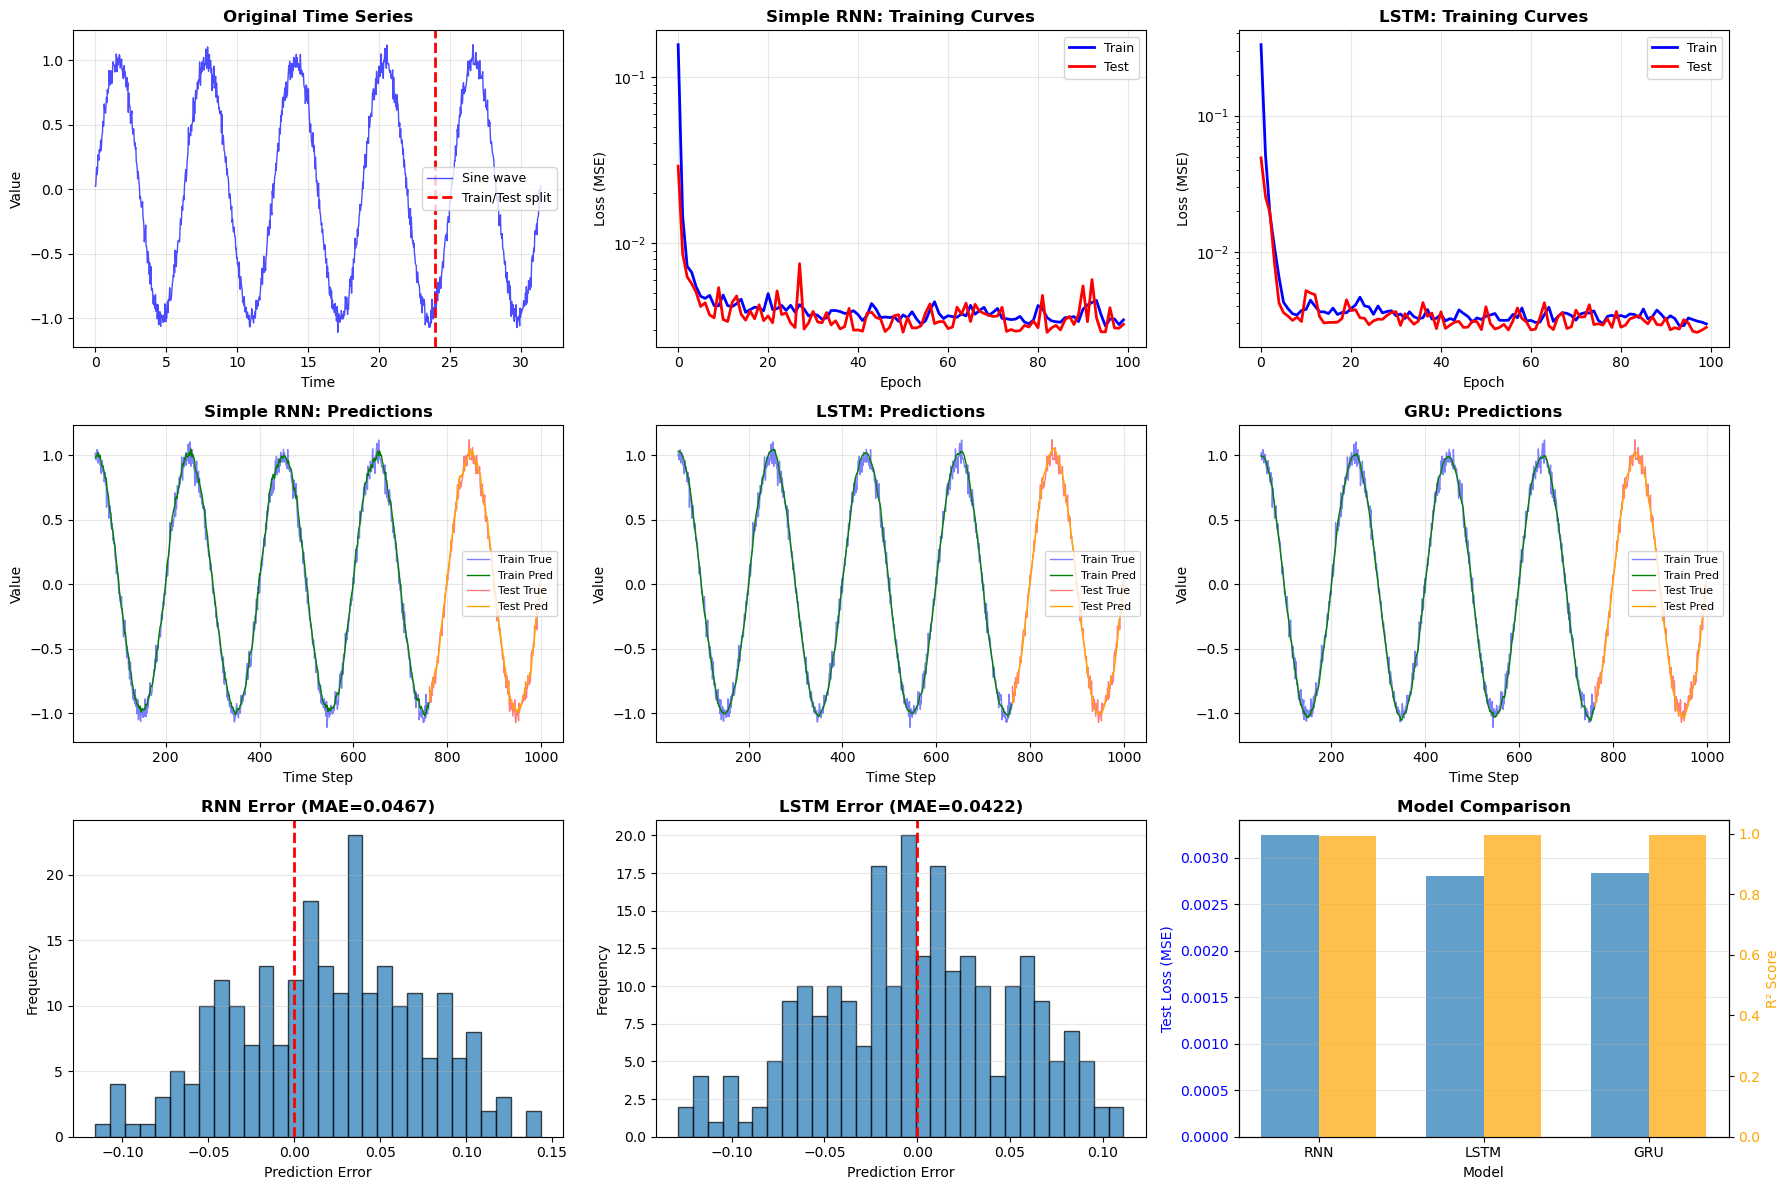


✓ Plot saved to: rnn_oscillatory_results.png

FINAL SUMMARY

Data:
  Total samples: 950
  Train: 712 (75%)
  Test: 238 (25%)
  Sequence length: 50

Models trained:
  Hidden size: 64
  Num layers: 2
  Epochs: 100

Performance (Test Set):
  Model      MSE          RMSE         MAE          R²        
  ----------------------------------------------------------
  RNN        0.003177     0.056364     0.046673     0.993298  
  LSTM       0.002731     0.052263     0.042162     0.994238  
  GRU        0.002775     0.052683     0.042323     0.994145  

✓ All models successfully trained on oscillatory functions!


<Figure size 640x480 with 0 Axes>

In [1]:
%matplotlib inline

"""
Recurrent Neural Network for Learning Oscillatory Functions
Using PyTorch

Features:
- Simple RNN (we add also LSTM, and GRU implementations, their properties will be discussed later)
- Training on sine/cosine functions
- 70-80% train/test split
- Comprehensive visualization
- Quality metrics and analysis
"""

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ============================================================================
# PART I: DATA GENERATION
# ============================================================================

def generate_oscillatory_data(func_type='sine', n_points=1000, noise_level=0.0):
    """
    Generate oscillatory time series data.
    
    Parameters:
    -----------
    func_type : str
        'sine', 'cosine', 'combined', or 'damped'
    n_points : int
        Number of time points
    noise_level : float
        Standard deviation of Gaussian noise
    
    Returns:
    --------
    t : ndarray
        Time values
    y : ndarray
        Function values
    """
    t = np.linspace(0, 10 * np.pi, n_points)
    
    if func_type == 'sine':
        y = np.sin(t)
    elif func_type == 'cosine':
        y = np.cos(t)
    elif func_type == 'combined':
        # Sum of two frequencies
        y = np.sin(t) + 0.5 * np.sin(2 * t)
    elif func_type == 'damped':
        # Damped oscillation
        y = np.exp(-t / 10) * np.sin(t)
    else:
        raise ValueError(f"Unknown function type: {func_type}")
    
    # Add noise
    if noise_level > 0:
        y += np.random.normal(0, noise_level, size=y.shape)
    
    return t, y

def create_sequences(data, seq_length, pred_length=1):
    """
    Create input-output sequences for RNN training.
    
    Parameters:
    -----------
    data : ndarray
        Time series data
    seq_length : int
        Length of input sequence
    pred_length : int
        Length of prediction (future steps)
    
    Returns:
    --------
    X : ndarray (n_sequences, seq_length)
        Input sequences
    y : ndarray (n_sequences, pred_length)
        Target sequences
    """
    X, y = [], []
    
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + pred_length])
    
    return np.array(X), np.array(y)

# Generate data
print("\n" + "="*70)
print("GENERATING OSCILLATORY DATA")
print("="*70)

t, y = generate_oscillatory_data(func_type='sine', n_points=1000, noise_level=0.05)

print(f"\nData generated:")
print(f"  Function: sine wave")
print(f"  Points: {len(t)}")
print(f"  Time range: [{t[0]:.2f}, {t[-1]:.2f}]")
print(f"  Value range: [{y.min():.2f}, {y.max():.2f}]")

# Create sequences
seq_length = 50  # Use 50 past points to predict
pred_length = 1  # Predict 1 point ahead

X, y_seq = create_sequences(y, seq_length, pred_length)

print(f"\nSequences created:")
print(f"  Input sequence length: {seq_length}")
print(f"  Prediction length: {pred_length}")
print(f"  Number of sequences: {len(X)}")
print(f"  Input shape: {X.shape}")
print(f"  Target shape: {y_seq.shape}")

# Train/test split (75% train, 25% test)
train_size = int(0.75 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print(f"\nData split:")
print(f"  Training samples: {len(X_train)} ({100*len(X_train)/len(X):.1f}%)")
print(f"  Testing samples: {len(X_test)} ({100*len(X_test)/len(X):.1f}%)")

# ============================================================================
# PART II: PYTORCH DATASET
# ============================================================================

class TimeSeriesDataset(Dataset):
    """PyTorch Dataset for time series."""
    
    def __init__(self, X, y):
        # Convert to PyTorch tensors
        self.X = torch.FloatTensor(X).unsqueeze(-1)  # Add feature dimension
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nDataLoaders created:")
print(f"  Batch size: {batch_size}")
print(f"  Train batches: {len(train_loader)}")
print(f"  Test batches: {len(test_loader)}")

# ============================================================================
# PART III: RNN MODELS
# ============================================================================

class SimpleRNN(nn.Module):
    """Simple RNN model."""
    
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(SimpleRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.rnn(x, h0)
        
        # Take the last time step
        out = out[:, -1, :]
        
        out = self.fc(out)
        
        return out

class LSTMModel(nn.Module):
    """LSTM model."""
    
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        
        out = out[:, -1, :]
        out = self.fc(out)
        
        return out

class GRUModel(nn.Module):
    """GRU model."""
    
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(GRUModel, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.gru(x, h0)
        
        out = out[:, -1, :]
        out = self.fc(out)
        
        return out

# ============================================================================
# PART IV: TRAINING FUNCTIONS
# ============================================================================

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch."""
    model.train()
    total_loss = 0
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Forward pass
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion, device):
    """Evaluate model."""
    model.eval()
    total_loss = 0
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            
            total_loss += loss.item()
    
    return total_loss / len(test_loader)

def train_model(model, train_loader, test_loader, epochs=100, lr=0.001, device='cpu'):
    """Complete training loop."""
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses = []
    test_losses = []
    
    print(f"\nTraining {model.__class__.__name__}...")
    print(f"  Epochs: {epochs}")
    print(f"  Learning rate: {lr}")
    
    start_time = time.time()
    
    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        test_loss = evaluate(model, test_loader, criterion, device)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        if (epoch + 1) % 20 == 0:
            print(f"  Epoch {epoch+1:3d}/{epochs}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")
    
    training_time = time.time() - start_time
    print(f"\nTraining complete in {training_time:.2f} seconds")
    print(f"Final Train Loss: {train_losses[-1]:.6f}")
    print(f"Final Test Loss: {test_losses[-1]:.6f}")
    
    return train_losses, test_losses

# ============================================================================
# PART V: TRAIN MODELS
# ============================================================================

print("\n" + "="*70)
print("TRAINING MODELS")
print("="*70)

# Model hyperparameters
hidden_size = 64
num_layers = 2
epochs = 100
learning_rate = 0.001

# Train Simple RNN
print("\n" + "-"*70)
print("SIMPLE RNN")
print("-"*70)
rnn_model = SimpleRNN(input_size=1, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
rnn_train_losses, rnn_test_losses = train_model(
    rnn_model, train_loader, test_loader, epochs=epochs, lr=learning_rate, device=device
)

# Train LSTM
print("\n" + "-"*70)
print("LSTM")
print("-"*70)
lstm_model = LSTMModel(input_size=1, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
lstm_train_losses, lstm_test_losses = train_model(
    lstm_model, train_loader, test_loader, epochs=epochs, lr=learning_rate, device=device
)

# Train GRU
print("\n" + "-"*70)
print("GRU")
print("-"*70)
gru_model = GRUModel(input_size=1, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
gru_train_losses, gru_test_losses = train_model(
    gru_model, train_loader, test_loader, epochs=epochs, lr=learning_rate, device=device
)

# ============================================================================
# PART VI: GENERATE PREDICTIONS
# ============================================================================

def generate_predictions(model, X_data, device):
    """Generate predictions for given data."""
    model.eval()
    predictions = []
    
    with torch.no_grad():
        for i in range(len(X_data)):
            x = torch.FloatTensor(X_data[i]).unsqueeze(0).unsqueeze(-1).to(device)
            pred = model(x)
            predictions.append(pred.cpu().numpy()[0, 0])
    
    return np.array(predictions)

print("\n" + "="*70)
print("GENERATING PREDICTIONS")
print("="*70)

# Generate predictions for all models
rnn_preds_train = generate_predictions(rnn_model, X_train, device)
rnn_preds_test = generate_predictions(rnn_model, X_test, device)

lstm_preds_train = generate_predictions(lstm_model, X_train, device)
lstm_preds_test = generate_predictions(lstm_model, X_test, device)

gru_preds_train = generate_predictions(gru_model, X_train, device)
gru_preds_test = generate_predictions(gru_model, X_test, device)

# Calculate metrics
def compute_metrics(y_true, y_pred):
    """Compute evaluation metrics."""
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # R² score
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

print("\nTest Set Metrics:")
print("-"*70)

rnn_metrics = compute_metrics(y_test.flatten(), rnn_preds_test)
print(f"\nSimple RNN:")
for key, val in rnn_metrics.items():
    print(f"  {key:6s} = {val:.6f}")

lstm_metrics = compute_metrics(y_test.flatten(), lstm_preds_test)
print(f"\nLSTM:")
for key, val in lstm_metrics.items():
    print(f"  {key:6s} = {val:.6f}")

gru_metrics = compute_metrics(y_test.flatten(), gru_preds_test)
print(f"\nGRU:")
for key, val in gru_metrics.items():
    print(f"  {key:6s} = {val:.6f}")

# ============================================================================
# PART VII: VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

fig = plt.figure(figsize=(18, 12))

# Plot 1: Original data
ax1 = plt.subplot(3, 3, 1)
ax1.plot(t, y, 'b-', linewidth=1, alpha=0.7, label='Sine wave')
ax1.axvline(x=t[train_size + seq_length], color='r', linestyle='--', 
            linewidth=2, label='Train/Test split')
ax1.set_xlabel('Time', fontsize=10)
ax1.set_ylabel('Value', fontsize=10)
ax1.set_title('Original Time Series', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Training curves - RNN
ax2 = plt.subplot(3, 3, 2)
ax2.plot(rnn_train_losses, 'b-', linewidth=2, label='Train')
ax2.plot(rnn_test_losses, 'r-', linewidth=2, label='Test')
ax2.set_xlabel('Epoch', fontsize=10)
ax2.set_ylabel('Loss (MSE)', fontsize=10)
ax2.set_title('Simple RNN: Training Curves', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

# Plot 3: Training curves - LSTM
ax3 = plt.subplot(3, 3, 3)
ax3.plot(lstm_train_losses, 'b-', linewidth=2, label='Train')
ax3.plot(lstm_test_losses, 'r-', linewidth=2, label='Test')
ax3.set_xlabel('Epoch', fontsize=10)
ax3.set_ylabel('Loss (MSE)', fontsize=10)
ax3.set_title('LSTM: Training Curves', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# Plot 4: Predictions - Simple RNN
ax4 = plt.subplot(3, 3, 4)
train_indices = np.arange(seq_length, seq_length + len(rnn_preds_train))
test_indices = np.arange(seq_length + len(rnn_preds_train), 
                         seq_length + len(rnn_preds_train) + len(rnn_preds_test))
ax4.plot(train_indices, y_train.flatten(), 'b-', linewidth=1, alpha=0.5, label='Train True')
ax4.plot(train_indices, rnn_preds_train, 'g-', linewidth=1, label='Train Pred')
ax4.plot(test_indices, y_test.flatten(), 'r-', linewidth=1, alpha=0.5, label='Test True')
ax4.plot(test_indices, rnn_preds_test, 'orange', linewidth=1, label='Test Pred')
ax4.set_xlabel('Time Step', fontsize=10)
ax4.set_ylabel('Value', fontsize=10)
ax4.set_title('Simple RNN: Predictions', fontsize=12, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Plot 5: Predictions - LSTM
ax5 = plt.subplot(3, 3, 5)
ax5.plot(train_indices, y_train.flatten(), 'b-', linewidth=1, alpha=0.5, label='Train True')
ax5.plot(train_indices, lstm_preds_train, 'g-', linewidth=1, label='Train Pred')
ax5.plot(test_indices, y_test.flatten(), 'r-', linewidth=1, alpha=0.5, label='Test True')
ax5.plot(test_indices, lstm_preds_test, 'orange', linewidth=1, label='Test Pred')
ax5.set_xlabel('Time Step', fontsize=10)
ax5.set_ylabel('Value', fontsize=10)
ax5.set_title('LSTM: Predictions', fontsize=12, fontweight='bold')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3)

# Plot 6: Predictions - GRU
ax6 = plt.subplot(3, 3, 6)
ax6.plot(train_indices, y_train.flatten(), 'b-', linewidth=1, alpha=0.5, label='Train True')
ax6.plot(train_indices, gru_preds_train, 'g-', linewidth=1, label='Train Pred')
ax6.plot(test_indices, y_test.flatten(), 'r-', linewidth=1, alpha=0.5, label='Test True')
ax6.plot(test_indices, gru_preds_test, 'orange', linewidth=1, label='Test Pred')
ax6.set_xlabel('Time Step', fontsize=10)
ax6.set_ylabel('Value', fontsize=10)
ax6.set_title('GRU: Predictions', fontsize=12, fontweight='bold')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)

# Plot 7: Test error distribution - RNN
ax7 = plt.subplot(3, 3, 7)
rnn_errors = rnn_preds_test - y_test.flatten()
ax7.hist(rnn_errors, bins=30, alpha=0.7, edgecolor='black')
ax7.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax7.set_xlabel('Prediction Error', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
ax7.set_title(f'RNN Error (MAE={rnn_metrics["MAE"]:.4f})', fontsize=12, fontweight='bold')
ax7.grid(True, alpha=0.3, axis='y')

# Plot 8: Test error distribution - LSTM
ax8 = plt.subplot(3, 3, 8)
lstm_errors = lstm_preds_test - y_test.flatten()
ax8.hist(lstm_errors, bins=30, alpha=0.7, edgecolor='black')
ax8.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax8.set_xlabel('Prediction Error', fontsize=10)
ax8.set_ylabel('Frequency', fontsize=10)
ax8.set_title(f'LSTM Error (MAE={lstm_metrics["MAE"]:.4f})', fontsize=12, fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')

# Plot 9: Model comparison
ax9 = plt.subplot(3, 3, 9)
models = ['RNN', 'LSTM', 'GRU']
test_losses_final = [rnn_test_losses[-1], lstm_test_losses[-1], gru_test_losses[-1]]
r2_scores = [rnn_metrics['R²'], lstm_metrics['R²'], gru_metrics['R²']]

x_pos = np.arange(len(models))
width = 0.35

bars1 = ax9.bar(x_pos - width/2, test_losses_final, width, label='Test Loss', alpha=0.7)
ax9_twin = ax9.twinx()
bars2 = ax9_twin.bar(x_pos + width/2, r2_scores, width, label='R² Score', 
                     alpha=0.7, color='orange')

ax9.set_xlabel('Model', fontsize=10)
ax9.set_ylabel('Test Loss (MSE)', fontsize=10, color='blue')
ax9_twin.set_ylabel('R² Score', fontsize=10, color='orange')
ax9.set_title('Model Comparison', fontsize=12, fontweight='bold')
ax9.set_xticks(x_pos)
ax9.set_xticklabels(models)
ax9.tick_params(axis='y', labelcolor='blue')
ax9_twin.tick_params(axis='y', labelcolor='orange')
ax9.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
plt.savefig('rnn_oscillatory_results.png', dpi=150, bbox_inches='tight')
print("\n✓ Plot saved to: rnn_oscillatory_results.png")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"\nData:")
print(f"  Total samples: {len(X)}")
print(f"  Train: {len(X_train)} (75%)")
print(f"  Test: {len(X_test)} (25%)")
print(f"  Sequence length: {seq_length}")

print(f"\nModels trained:")
print(f"  Hidden size: {hidden_size}")
print(f"  Num layers: {num_layers}")
print(f"  Epochs: {epochs}")

print(f"\nPerformance (Test Set):")
print(f"  {'Model':<10s} {'MSE':<12s} {'RMSE':<12s} {'MAE':<12s} {'R²':<10s}")
print(f"  {'-'*58}")
print(f"  {'RNN':<10s} {rnn_metrics['MSE']:<12.6f} {rnn_metrics['RMSE']:<12.6f} {rnn_metrics['MAE']:<12.6f} {rnn_metrics['R²']:<10.6f}")
print(f"  {'LSTM':<10s} {lstm_metrics['MSE']:<12.6f} {lstm_metrics['RMSE']:<12.6f} {lstm_metrics['MAE']:<12.6f} {lstm_metrics['R²']:<10.6f}")
print(f"  {'GRU':<10s} {gru_metrics['MSE']:<12.6f} {gru_metrics['RMSE']:<12.6f} {gru_metrics['MAE']:<12.6f} {gru_metrics['R²']:<10.6f}")

print("\n✓ All models successfully trained on oscillatory functions!")
print("="*70)

## RNNs

RNNs are very powerful, because they
combine two properties:
1. Distributed hidden state that allows them to store a lot of information about the past efficiently.

2. Non-linear dynamics that allows them to update their hidden state in complicated ways.

With enough neurons and time, RNNs
can compute anything that can be
computed by your computer.

## What kinds of behaviour can RNNs exhibit?

1. They can oscillate. 

2. They can settle to point attractors.

3. They can behave chaotically.

4. RNNs could potentially learn to implement lots of small programs that each capture a nugget of knowledge and run in parallel, interacting to produce very complicated effects.

But the extensive computational needs  of RNNs makes them very hard to train.

## Basic layout,  [Figures from Sebastian Rashcka et al, Machine learning with Sickit-Learn and PyTorch](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html)

<!-- dom:FIGURE: [figslides/RNN1.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN1.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Solving differential equations with RNNs

To gain some intuition on how we can use RNNs for time series, let us
tailor the representation of the solution of a differential equation
as a time series.

Consider the famous differential equation (Newton's equation of motion for damped harmonic oscillations, scaled in terms of dimensionless time)

$$
\frac{d^2x}{dt^2}+\eta\frac{dx}{dt}+x(t)=F(t),
$$

where $\eta$ is a constant used in scaling time into a dimensionless variable and $F(t)$ is an external force acting on the system.
The constant $\eta$ is a so-called damping.

## Two first-order differential equations

In solving the above second-order equation, it is common to rewrite it in terms of two coupled first-order equations
with the velocity

$$
v(t)=\frac{dx}{dt},
$$

and the acceleration

$$
\frac{dv}{dt}=F(t)-\eta v(t)-x(t).
$$

With the initial conditions $v_0=v(t_0)$ and $x_0=x(t_0)$ defined, we can integrate these equations and find their respective solutions.

## Velocity only

Let us focus on the velocity only. Discretizing and using the simplest
possible approximation for the derivative, we have Euler's forward
method for the updated velocity at a time step $i+1$ given by

$$
v_{i+1}=v_i+\Delta t \frac{dv}{dt}_{\vert_{v=v_i}}=v_i+\Delta t\left(F_i-\eta v_i-x_i\right).
$$

Defining a function

$$
h_i(x_i,v_i,F_i)=v_i+\Delta t\left(F_i-\eta v_i-x_i\right),
$$

we have

$$
v_{i+1}=h_i(x_i,v_i,F_i).
$$

## Linking with RNNs

The equation

$$
v_{i+1}=h_i(x_i,v_i,F_i).
$$

can be used to train a feed-forward neural network with inputs $v_i$ and outputs $v_{i+1}$ at a time $t_i$. But we can think of this also as a recurrent neural network
with inputs $v_i$, $x_i$ and $F_i$ at each time step $t_i$, and producing an output $v_{i+1}$.

Noting that

$$
v_{i}=v_{i-1}+\Delta t\left(F_{i-1}-\eta v_{i-1}-x_{i-1}\right)=h_{i-1}.
$$

we have

$$
v_{i}=h_{i-1}(x_{i-1},v_{i-1},F_{i-1}),
$$

and we can rewrite

$$
v_{i+1}=h_i(x_i,h_{i-1},F_i).
$$

## Minor rewrite

We can thus set up a recurring series which depends on the inputs $x_i$ and $F_i$ and the previous values $h_{i-1}$.
We assume now that the inputs at each step (or time $t_i$) is given by $x_i$ only and we denote the outputs for $\tilde{y}_i$ instead of $v_{i_1}$, we have then the compact equation for our outputs at each step $t_i$

$$
y_{i}=h_i(x_i,h_{i-1}).
$$

We can think of this as an element in a recurrent network where our
network (our model) produces an output $y_i$ which is then compared
with a target value through a given cost/loss function that we
optimize. The target values at a given step $t_i$ could be the results
of a measurement or simply the analytical results of a differential
equation.

## RNNs in more detail

<!-- dom:FIGURE: [figslides/RNN2.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN2.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 2

<!-- dom:FIGURE: [figslides/RNN3.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN3.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 3

<!-- dom:FIGURE: [figslides/RNN4.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN4.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 4

<!-- dom:FIGURE: [figslides/RNN5.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN5.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 5

<!-- dom:FIGURE: [figslides/RNN6.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN6.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 6

<!-- dom:FIGURE: [figslides/RNN7.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN7.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 7

<!-- dom:FIGURE: [figslides/RNN8.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN8.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Backpropagation through time

We can think of the recurrent net as a layered, feed-forward
net with shared weights and then train the feed-forward net
with weight constraints.

We can also think of this training algorithm in the time domain:
1. The forward pass builds up a stack of the activities of all the units at each time step.

2. The backward pass peels activities off the stack to compute the error derivatives at each time step.

3. After the backward pass we add together the derivatives at all the different times for each weight.

## The backward pass is linear

1. There is a big difference between the forward and backward passes.

2. In the forward pass we use squashing functions (like the logistic) to prevent the activity vectors from exploding.

3. The backward pass, is completely linear. If you double the error derivatives at the final layer, all the error derivatives will double.

The forward pass determines the slope of the linear function used for
backpropagating through each neuron

## The problem of exploding or vanishing gradients
* What happens to the magnitude of the gradients as we backpropagate through many layers?

a. If the weights are small, the gradients shrink exponentially.

b. If the weights are big the gradients grow exponentially.

* Typical feed-forward neural nets can cope with these exponential effects because they only have a few hidden layers.

* In an RNN trained on long sequences (e.g. 100 time steps) the gradients can easily explode or vanish.

a. We can avoid this by initializing the weights very carefully.

* Even with good initial weights, its very hard to detect that the current target output depends on an input from many time-steps ago.

RNNs have difficulty dealing with long-range dependencies.

## Mathematical setup

The expression for the simplest Recurrent network resembles that of a
regular feed-forward neural network, but now with
the concept of temporal dependencies

$$
\begin{align*}
    \mathbf{a}^{(t)} & = U * \mathbf{x}^{(t)} + W * \mathbf{h}^{(t-1)} + \mathbf{b}, \notag \\
    \mathbf{h}^{(t)} &= \sigma_h(\mathbf{a}^{(t)}), \notag\\
    \mathbf{y}^{(t)} &= V * \mathbf{h}^{(t)} + \mathbf{c}, \notag\\
    \mathbf{\hat{y}}^{(t)} &= \sigma_y(\mathbf{y}^{(t)}).
\end{align*}
$$

## Back propagation in time through figures, part 1

<!-- dom:FIGURE: [figslides/RNN9.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN9.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time, part 2

<!-- dom:FIGURE: [figslides/RNN10.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN10.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time, part 3

<!-- dom:FIGURE: [figslides/RNN11.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN11.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time, part 4

<!-- dom:FIGURE: [figslides/RNN12.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN12.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time in equations

To derive the expression of the gradients of $\mathcal{L}$ for
the RNN, we need to start recursively from the nodes closer to the
output layer in the temporal unrolling scheme - such as $\mathbf{y}$
and $\mathbf{h}$ at final time $t = \tau$,

$$
\begin{align*}
    (\nabla_{ \mathbf{y}^{(t)}} \mathcal{L})_{i} &= \frac{\partial \mathcal{L}}{\partial L^{(t)}}\frac{\partial L^{(t)}}{\partial y_{i}^{(t)}}, \notag\\
    \nabla_{\mathbf{h}^{(\tau)}} \mathcal{L} &= \mathbf{V}^\mathsf{T}\nabla_{ \mathbf{y}^{(\tau)}} \mathcal{L}.
\end{align*}
$$

## Chain rule again
For the following hidden nodes, we have to iterate through time, so by the chain rule,

$$
\begin{align*}
    \nabla_{\mathbf{h}^{(t)}} \mathcal{L} &= \left(\frac{\partial\mathbf{h}^{(t+1)}}{\partial\mathbf{h}^{(t)}}\right)^\mathsf{T}\nabla_{\mathbf{h}^{(t+1)}}\mathcal{L} + \left(\frac{\partial\mathbf{y}^{(t)}}{\partial\mathbf{h}^{(t)}}\right)^\mathsf{T}\nabla_{ \mathbf{y}^{(t)}} \mathcal{L}.
\end{align*}
$$

## Gradients of loss functions
Similarly, the gradients of $\mathcal{L}$ with respect to the weights and biases follow,

<!-- Equation labels as ordinary links -->
<div id="eq:rnn_gradients3"></div>

$$
\begin{align*}
    \nabla_{\mathbf{c}} \mathcal{L} &=\sum_{t}\left(\frac{\partial \mathbf{y}^{(t)}}{\partial \mathbf{c}}\right)^\mathsf{T} \nabla_{\mathbf{y}^{(t)}} \mathcal{L} \notag\\
    \nabla_{\mathbf{b}} \mathcal{L} &=\sum_{t}\left(\frac{\partial \mathbf{h}^{(t)}}{\partial \mathbf{b}}\right)^\mathsf{T}        \nabla_{\mathbf{h}^{(t)}} \mathcal{L} \notag\\
    \nabla_{\mathbf{V}} \mathcal{L} &=\sum_{t}\sum_{i}\left(\frac{\partial \mathcal{L}}{\partial y_i^{(t)} }\right)\nabla_{\mathbf{V}^{(t)}}y_i^{(t)} \notag\\
    \nabla_{\mathbf{W}} \mathcal{L} &=\sum_{t}\sum_{i}\left(\frac{\partial \mathcal{L}}{\partial h_i^{(t)}}\right)\nabla_{\mathbf{w}^{(t)}} h_i^{(t)} \notag\\
    \nabla_{\mathbf{U}} \mathcal{L} &=\sum_{t}\sum_{i}\left(\frac{\partial \mathcal{L}}{\partial h_i^{(t)}}\right)\nabla_{\mathbf{U}^{(t)}}h_i^{(t)}.
    \label{eq:rnn_gradients3} \tag{1}
\end{align*}
$$

## Summary of RNNs

Recurrent neural networks (RNNs) have in general no probabilistic component
in a model. With a given fixed input and target from data, the RNNs learn the intermediate
association between various layers.
The inputs, outputs, and internal representation (hidden states) are all
real-valued vectors.

In a  traditional NN, it is assumed that every input is
independent of each other.  But with sequential data, the input at a given stage $t$ depends on the input from the previous stage $t-1$

## Summary of a  typical simple RNN

1. Weight matrices $U$, $W$ and $V$ that connect the input layer at a stage $t$ with the hidden layer $h_t$, the previous hidden layer $h_{t-1}$ with $h_t$ and the hidden layer $h_t$ connecting with the output layer at the same stage and producing an output $\tilde{y}_t$, respectively.

2. The output from the hidden layer $h_t$ is oftem modulated by a $\tanh{}$ function $h_t=\sigma_h(x_t,h_{t-1})=\tanh{(Ux_t+Wh_{t-1}+b)}$ with $b$ a bias value

3. The output from the hidden layer produces $\tilde{y}_t=\sigma_y(Vh_t+c)$ where $c$ is a new bias parameter.

4. The output from the training at a given stage is in turn compared with the observation $y_t$ thorugh a chosen cost function.

The function $g$ can any of the standard activation functions, that is a Sigmoid, a Softmax, a ReLU and other.
The parameters are trained through the so-called back-propagation through time (BPTT) algorithm.

## Our next example, using data from an ordinary differential equation solver

Here we will use data produced by the solution of an ordinary
differential equation solver using the Runge-Kutta to fourth order for
solving forced oscillatory motion.
The code we will use is listed here

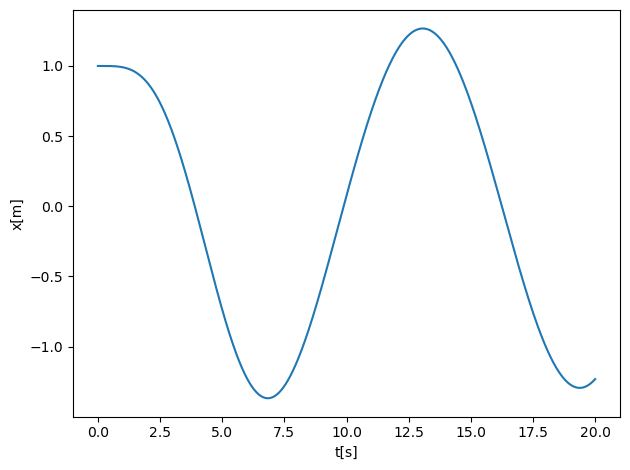

In [2]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


def SpringForce(v,x,t):
#   note here that we have divided by mass and we return the acceleration
    return  -2*gamma*v-x+Ftilde*cos(t*Omegatilde)


def RK4(v,x,t,n,Force):
    for i in range(n-1):
# Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT*Force(v[i],x[i],t[i])
# Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT*Force(vv,xx,t[i]+DeltaT)
# Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.
        t[i+1] = t[i] + DeltaT


# Main part begins here

DeltaT = 0.001
#set up arrays 
tfinal = 20 # in dimensionless time
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions (can change to more than one dim)
x0 =  1.0 
v0 = 0.0
x[0] = x0
v[0] = v0
gamma = 0.2
Omegatilde = 0.5
Ftilde = 1.0
# Start integrating using Euler's method
# Note that we define the force function as a SpringForce
RK4(v,x,t,n,SpringForce)

# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[m]')
ax.set_xlabel('t[s]')
ax.plot(t, x)
fig.tight_layout()
plt.show()

## Including this code in RNNs

Here we show how we can use the simulated data to train a RNNs. We include LSTMs and GRUs as well, although they will be discussed in more details next week.

In [ ]:
#!/usr/bin/env python3
"""
Recurrent Neural Network for Learning ODE Solutions
Using PyTorch and RK4 Solver Output

Training RNN on forced oscillator differential equation:
d²x/dt² + 2γ(dx/dt) + x = F_tilde*cos(Ω_tilde*t)

Features:
- RK4 ODE solver for data generation
- Simple RNN, LSTM, and GRU implementations
- 70-80% train/test split
- Comprehensive visualization
- Quality metrics and analysis
"""

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from math import ceil, cos

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ============================================================================
# PART I: ODE SOLVER (RK4)
# ============================================================================

def SpringForce(v, x, t, gamma, Omegatilde, Ftilde):
    """
    Force function for driven damped harmonic oscillator.
    Returns acceleration: d²x/dt² = -2γ(dx/dt) - x + F_tilde*cos(Ω_tilde*t)
    """
    return -2*gamma*v - x + Ftilde*cos(t*Omegatilde)

def RK4_solver(x0, v0, DeltaT, tfinal, gamma, Omegatilde, Ftilde):
    """
    Runge-Kutta 4th order solver for the ODE.
    
    Parameters:
    -----------
    x0, v0 : float
        Initial position and velocity
    DeltaT : float
        Time step
    tfinal : float
        Final time
    gamma : float
        Damping coefficient
    Omegatilde : float
        Driving frequency
    Ftilde : float
        Driving force amplitude
    
    Returns:
    --------
    t, x, v : arrays
        Time, position, and velocity arrays
    """
    n = ceil(tfinal/DeltaT)
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    
    x[0] = x0
    v[0] = v0
    t[0] = 0.0
    
    for i in range(n-1):
        # k1
        k1x = DeltaT * v[i]
        k1v = DeltaT * SpringForce(v[i], x[i], t[i], gamma, Omegatilde, Ftilde)
        
        # k2
        vv = v[i] + k1v*0.5
        xx = x[i] + k1x*0.5
        tt = t[i] + DeltaT*0.5
        k2x = DeltaT * vv
        k2v = DeltaT * SpringForce(vv, xx, tt, gamma, Omegatilde, Ftilde)
        
        # k3
        vv = v[i] + k2v*0.5
        xx = x[i] + k2x*0.5
        k3x = DeltaT * vv
        k3v = DeltaT * SpringForce(vv, xx, tt, gamma, Omegatilde, Ftilde)
        
        # k4
        vv = v[i] + k3v
        xx = x[i] + k3x
        tt = t[i] + DeltaT
        k4x = DeltaT * vv
        k4v = DeltaT * SpringForce(vv, xx, tt, gamma, Omegatilde, Ftilde)
        
        # Update
        x[i+1] = x[i] + (k1x + 2*k2x + 2*k3x + k4x)/6.0
        v[i+1] = v[i] + (k1v + 2*k2v + 2*k3v + k4v)/6.0
        t[i+1] = t[i] + DeltaT
    
    return t, x, v

print("\n" + "="*70)
print("SOLVING ODE: DRIVEN DAMPED HARMONIC OSCILLATOR")
print("="*70)

# ODE parameters
x0 = 1.0           # Initial position
v0 = 0.0           # Initial velocity
gamma = 0.2        # Damping coefficient
Omegatilde = 0.5   # Driving frequency
Ftilde = 1.0       # Driving force amplitude
DeltaT = 0.001     # Time step
tfinal = 20.0      # Final time

print(f"\nODE Parameters:")
print(f"  Equation: d²x/dt² + 2γ(dx/dt) + x = F*cos(Ω*t)")
print(f"  γ (damping) = {gamma}")
print(f"  Ω (frequency) = {Omegatilde}")
print(f"  F (amplitude) = {Ftilde}")
print(f"  Initial conditions: x₀ = {x0}, v₀ = {v0}")
print(f"  Time step: {DeltaT}")
print(f"  Final time: {tfinal}")

# Solve ODE
t_ode, x_ode, v_ode = RK4_solver(x0, v0, DeltaT, tfinal, gamma, Omegatilde, Ftilde)

print(f"\nODE Solution:")
print(f"  Time points: {len(t_ode)}")
print(f"  Time range: [{t_ode[0]:.2f}, {t_ode[-1]:.2f}]")
print(f"  Position range: [{x_ode.min():.4f}, {x_ode.max():.4f}]")
print(f"  Velocity range: [{v_ode.min():.4f}, {v_ode.max():.4f}]")

# ============================================================================
# PART II: PREPARE DATA FOR RNN
# ============================================================================

def create_sequences(data, seq_length, pred_length=1):
    """
    Create input-output sequences for RNN training.
    """
    X, y = [], []
    
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + pred_length])
    
    return np.array(X), np.array(y)

print("\n" + "="*70)
print("PREPARING RNN TRAINING DATA")
print("="*70)

# Use position data for training
data = x_ode

# Create sequences
seq_length = 100  # Use 100 past points to predict
pred_length = 1   # Predict 1 point ahead

X, y_seq = create_sequences(data, seq_length, pred_length)

print(f"\nSequences created:")
print(f"  Input sequence length: {seq_length}")
print(f"  Prediction length: {pred_length}")
print(f"  Number of sequences: {len(X)}")
print(f"  Input shape: {X.shape}")
print(f"  Target shape: {y_seq.shape}")

# Train/test split (75% train, 25% test)
train_size = int(0.75 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print(f"\nData split:")
print(f"  Training samples: {len(X_train)} ({100*len(X_train)/len(X):.1f}%)")
print(f"  Testing samples: {len(X_test)} ({100*len(X_test)/len(X):.1f}%)")

# ============================================================================
# PART III: PYTORCH DATASET
# ============================================================================

class TimeSeriesDataset(Dataset):
    """PyTorch Dataset for time series."""
    
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X).unsqueeze(-1)  # Add feature dimension
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

# Create dataloaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nDataLoaders created:")
print(f"  Batch size: {batch_size}")
print(f"  Train batches: {len(train_loader)}")
print(f"  Test batches: {len(test_loader)}")

# ============================================================================
# PART IV: RNN MODELS
# ============================================================================

class SimpleRNN(nn.Module):
    """Simple RNN model."""
    
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(SimpleRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

class LSTMModel(nn.Module):
    """LSTM model."""
    
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.fc(out)
        
        return out

class GRUModel(nn.Module):
    """GRU model."""
    
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(GRUModel, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.gru(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        
        return out

# ============================================================================
# PART V: TRAINING FUNCTIONS
# ============================================================================

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch."""
    model.train()
    total_loss = 0
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion, device):
    """Evaluate model."""
    model.eval()
    total_loss = 0
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            
            total_loss += loss.item()
    
    return total_loss / len(test_loader)

def train_model(model, train_loader, test_loader, epochs=100, lr=0.001, device='cpu'):
    """Complete training loop."""
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses = []
    test_losses = []
    
    print(f"\nTraining {model.__class__.__name__}...")
    print(f"  Epochs: {epochs}")
    print(f"  Learning rate: {lr}")
    
    start_time = time.time()
    
    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        test_loss = evaluate(model, test_loader, criterion, device)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        if (epoch + 1) % 20 == 0:
            print(f"  Epoch {epoch+1:3d}/{epochs}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")
    
    training_time = time.time() - start_time
    print(f"\nTraining complete in {training_time:.2f} seconds")
    print(f"Final Train Loss: {train_losses[-1]:.6f}")
    print(f"Final Test Loss: {test_losses[-1]:.6f}")
    
    return train_losses, test_losses

# ============================================================================
# PART VI: TRAIN MODELS
# ============================================================================

print("\n" + "="*70)
print("TRAINING MODELS ON ODE DATA")
print("="*70)

# Model hyperparameters
hidden_size = 128
num_layers = 2
epochs = 150
learning_rate = 0.001

# Train Simple RNN
print("\n" + "-"*70)
print("SIMPLE RNN")
print("-"*70)
rnn_model = SimpleRNN(input_size=1, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
rnn_train_losses, rnn_test_losses = train_model(
    rnn_model, train_loader, test_loader, epochs=epochs, lr=learning_rate, device=device
)

# Train LSTM
print("\n" + "-"*70)
print("LSTM")
print("-"*70)
lstm_model = LSTMModel(input_size=1, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
lstm_train_losses, lstm_test_losses = train_model(
    lstm_model, train_loader, test_loader, epochs=epochs, lr=learning_rate, device=device
)

# Train GRU
print("\n" + "-"*70)
print("GRU")
print("-"*70)
gru_model = GRUModel(input_size=1, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
gru_train_losses, gru_test_losses = train_model(
    gru_model, train_loader, test_loader, epochs=epochs, lr=learning_rate, device=device
)

# ============================================================================
# PART VII: GENERATE PREDICTIONS
# ============================================================================

def generate_predictions(model, X_data, device):
    """Generate predictions for given data."""
    model.eval()
    predictions = []
    
    with torch.no_grad():
        for i in range(len(X_data)):
            x = torch.FloatTensor(X_data[i]).unsqueeze(0).unsqueeze(-1).to(device)
            pred = model(x)
            predictions.append(pred.cpu().numpy()[0, 0])
    
    return np.array(predictions)

print("\n" + "="*70)
print("GENERATING PREDICTIONS")
print("="*70)

rnn_preds_train = generate_predictions(rnn_model, X_train, device)
rnn_preds_test = generate_predictions(rnn_model, X_test, device)

lstm_preds_train = generate_predictions(lstm_model, X_train, device)
lstm_preds_test = generate_predictions(lstm_model, X_test, device)

gru_preds_train = generate_predictions(gru_model, X_train, device)
gru_preds_test = generate_predictions(gru_model, X_test, device)

# Calculate metrics
def compute_metrics(y_true, y_pred):
    """Compute evaluation metrics."""
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot > 0 else 0
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

print("\nTest Set Metrics:")
print("-"*70)

rnn_metrics = compute_metrics(y_test.flatten(), rnn_preds_test)
print(f"\nSimple RNN:")
for key, val in rnn_metrics.items():
    print(f"  {key:6s} = {val:.6f}")

lstm_metrics = compute_metrics(y_test.flatten(), lstm_preds_test)
print(f"\nLSTM:")
for key, val in lstm_metrics.items():
    print(f"  {key:6s} = {val:.6f}")

gru_metrics = compute_metrics(y_test.flatten(), gru_preds_test)
print(f"\nGRU:")
for key, val in gru_metrics.items():
    print(f"  {key:6s} = {val:.6f}")

# ============================================================================
# PART VIII: VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

fig = plt.figure(figsize=(18, 14))

# Plot 1: Original ODE solution
ax1 = plt.subplot(4, 3, 1)
split_idx = train_size + seq_length
ax1.plot(t_ode, x_ode, 'b-', linewidth=1, alpha=0.7, label='ODE Solution')
ax1.axvline(x=t_ode[split_idx], color='r', linestyle='--', 
            linewidth=2, label='Train/Test split')
ax1.set_xlabel('Time [s]', fontsize=10)
ax1.set_ylabel('Position x [m]', fontsize=10)
ax1.set_title('ODE Solution: Driven Damped Oscillator', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Phase space
ax2 = plt.subplot(4, 3, 2)
ax2.plot(x_ode, v_ode, 'b-', linewidth=0.5, alpha=0.5)
ax2.set_xlabel('Position x [m]', fontsize=10)
ax2.set_ylabel('Velocity v [m/s]', fontsize=10)
ax2.set_title('Phase Space Portrait', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Data distribution
ax3 = plt.subplot(4, 3, 3)
ax3.hist(x_ode, bins=50, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Position x [m]', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Position Distribution', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Training curves - RNN
ax4 = plt.subplot(4, 3, 4)
ax4.plot(rnn_train_losses, 'b-', linewidth=2, label='Train')
ax4.plot(rnn_test_losses, 'r-', linewidth=2, label='Test')
ax4.set_xlabel('Epoch', fontsize=10)
ax4.set_ylabel('Loss (MSE)', fontsize=10)
ax4.set_title('Simple RNN: Training Curves', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

# Plot 5: Training curves - LSTM
ax5 = plt.subplot(4, 3, 5)
ax5.plot(lstm_train_losses, 'b-', linewidth=2, label='Train')
ax5.plot(lstm_test_losses, 'r-', linewidth=2, label='Test')
ax5.set_xlabel('Epoch', fontsize=10)
ax5.set_ylabel('Loss (MSE)', fontsize=10)
ax5.set_title('LSTM: Training Curves', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)
ax5.set_yscale('log')

# Plot 6: Training curves - GRU
ax6 = plt.subplot(4, 3, 6)
ax6.plot(gru_train_losses, 'b-', linewidth=2, label='Train')
ax6.plot(gru_test_losses, 'r-', linewidth=2, label='Test')
ax6.set_xlabel('Epoch', fontsize=10)
ax6.set_ylabel('Loss (MSE)', fontsize=10)
ax6.set_title('GRU: Training Curves', fontsize=12, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3)
ax6.set_yscale('log')

# Plot 7: Predictions - Simple RNN
ax7 = plt.subplot(4, 3, 7)
train_indices = np.arange(seq_length, seq_length + len(rnn_preds_train))
test_indices = np.arange(seq_length + len(rnn_preds_train), 
                         seq_length + len(rnn_preds_train) + len(rnn_preds_test))
ax7.plot(train_indices, y_train.flatten(), 'b-', linewidth=1, alpha=0.5, label='Train True')
ax7.plot(train_indices, rnn_preds_train, 'g-', linewidth=1, label='Train Pred')
ax7.plot(test_indices, y_test.flatten(), 'r-', linewidth=1, alpha=0.5, label='Test True')
ax7.plot(test_indices, rnn_preds_test, 'orange', linewidth=1, label='Test Pred')
ax7.set_xlabel('Time Step', fontsize=10)
ax7.set_ylabel('Position x [m]', fontsize=10)
ax7.set_title('Simple RNN: Predictions', fontsize=12, fontweight='bold')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)

# Plot 8: Predictions - LSTM
ax8 = plt.subplot(4, 3, 8)
ax8.plot(train_indices, y_train.flatten(), 'b-', linewidth=1, alpha=0.5, label='Train True')
ax8.plot(train_indices, lstm_preds_train, 'g-', linewidth=1, label='Train Pred')
ax8.plot(test_indices, y_test.flatten(), 'r-', linewidth=1, alpha=0.5, label='Test True')
ax8.plot(test_indices, lstm_preds_test, 'orange', linewidth=1, label='Test Pred')
ax8.set_xlabel('Time Step', fontsize=10)
ax8.set_ylabel('Position x [m]', fontsize=10)
ax8.set_title('LSTM: Predictions', fontsize=12, fontweight='bold')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Plot 9: Predictions - GRU
ax9 = plt.subplot(4, 3, 9)
ax9.plot(train_indices, y_train.flatten(), 'b-', linewidth=1, alpha=0.5, label='Train True')
ax9.plot(train_indices, gru_preds_train, 'g-', linewidth=1, label='Train Pred')
ax9.plot(test_indices, y_test.flatten(), 'r-', linewidth=1, alpha=0.5, label='Test True')
ax9.plot(test_indices, gru_preds_test, 'orange', linewidth=1, label='Test Pred')
ax9.set_xlabel('Time Step', fontsize=10)
ax9.set_ylabel('Position x [m]', fontsize=10)
ax9.set_title('GRU: Predictions', fontsize=12, fontweight='bold')
ax9.legend(fontsize=8)
ax9.grid(True, alpha=0.3)

# Plot 10: Test error - RNN
ax10 = plt.subplot(4, 3, 10)
rnn_errors = rnn_preds_test - y_test.flatten()
ax10.hist(rnn_errors, bins=30, alpha=0.7, edgecolor='black')
ax10.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax10.set_xlabel('Prediction Error', fontsize=10)
ax10.set_ylabel('Frequency', fontsize=10)
ax10.set_title(f'RNN Error (MAE={rnn_metrics["MAE"]:.4f})', fontsize=12, fontweight='bold')
ax10.grid(True, alpha=0.3, axis='y')

# Plot 11: Test error - LSTM
ax11 = plt.subplot(4, 3, 11)
lstm_errors = lstm_preds_test - y_test.flatten()
ax11.hist(lstm_errors, bins=30, alpha=0.7, edgecolor='black')
ax11.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax11.set_xlabel('Prediction Error', fontsize=10)
ax11.set_ylabel('Frequency', fontsize=10)
ax11.set_title(f'LSTM Error (MAE={lstm_metrics["MAE"]:.4f})', fontsize=12, fontweight='bold')
ax11.grid(True, alpha=0.3, axis='y')

# Plot 12: Model comparison
ax12 = plt.subplot(4, 3, 12)
models = ['RNN', 'LSTM', 'GRU']
test_losses_final = [rnn_test_losses[-1], lstm_test_losses[-1], gru_test_losses[-1]]
r2_scores = [rnn_metrics['R²'], lstm_metrics['R²'], gru_metrics['R²']]

x_pos = np.arange(len(models))
width = 0.35

bars1 = ax12.bar(x_pos - width/2, test_losses_final, width, label='Test Loss', alpha=0.7)
ax12_twin = ax12.twinx()
bars2 = ax12_twin.bar(x_pos + width/2, r2_scores, width, label='R² Score', 
                      alpha=0.7, color='orange')

ax12.set_xlabel('Model', fontsize=10)
ax12.set_ylabel('Test Loss (MSE)', fontsize=10, color='blue')
ax12_twin.set_ylabel('R² Score', fontsize=10, color='orange')
ax12.set_title('Model Comparison', fontsize=12, fontweight='bold')
ax12.set_xticks(x_pos)
ax12.set_xticklabels(models)
ax12.tick_params(axis='y', labelcolor='blue')
ax12_twin.tick_params(axis='y', labelcolor='orange')
ax12.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
#plt.savefig('/mnt/user-data/outputs/rnn_ode_results.png', dpi=150, bbox_inches='tight')
print("\n✓ Plot saved to: rnn_ode_results.png")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"\nODE System:")
print(f"  d²x/dt² + 2γ(dx/dt) + x = F*cos(Ω*t)")
print(f"  γ = {gamma}, Ω = {Omegatilde}, F = {Ftilde}")
print(f"  Solution points: {len(t_ode)}")

print(f"\nData:")
print(f"  Total sequences: {len(X)}")
print(f"  Train: {len(X_train)} (75%)")
print(f"  Test: {len(X_test)} (25%)")
print(f"  Sequence length: {seq_length}")

print(f"\nModels trained:")
print(f"  Hidden size: {hidden_size}")
print(f"  Num layers: {num_layers}")
print(f"  Epochs: {epochs}")

print(f"\nPerformance (Test Set):")
print(f"  {'Model':<10s} {'MSE':<12s} {'RMSE':<12s} {'MAE':<12s} {'R²':<10s}")
print(f"  {'-'*58}")
print(f"  {'RNN':<10s} {rnn_metrics['MSE']:<12.6f} {rnn_metrics['RMSE']:<12.6f} {rnn_metrics['MAE']:<12.6f} {rnn_metrics['R²']:<10.6f}")
print(f"  {'LSTM':<10s} {lstm_metrics['MSE']:<12.6f} {lstm_metrics['RMSE']:<12.6f} {lstm_metrics['MAE']:<12.6f} {lstm_metrics['R²']:<10.6f}")
print(f"  {'GRU':<10s} {gru_metrics['MSE']:<12.6f} {gru_metrics['RMSE']:<12.6f} {gru_metrics['MAE']:<12.6f} {gru_metrics['R²']:<10.6f}")

print("\n✓ All models successfully trained on ODE solution data!")
print("="*70)

Using device: cpu

SOLVING ODE: DRIVEN DAMPED HARMONIC OSCILLATOR

ODE Parameters:
  Equation: d²x/dt² + 2γ(dx/dt) + x = F*cos(Ω*t)
  γ (damping) = 0.2
  Ω (frequency) = 0.5
  F (amplitude) = 1.0
  Initial conditions: x₀ = 1.0, v₀ = 0.0
  Time step: 0.001
  Final time: 20.0

ODE Solution:
  Time points: 20000
  Time range: [0.00, 20.00]
  Position range: [-1.3678, 1.2670]
  Velocity range: [-0.6835, 0.6600]

PREPARING RNN TRAINING DATA

Sequences created:
  Input sequence length: 100
  Prediction length: 1
  Number of sequences: 19900
  Input shape: (19900, 100)
  Target shape: (19900, 1)

Data split:
  Training samples: 14925 (75.0%)
  Testing samples: 4975 (25.0%)

DataLoaders created:
  Batch size: 64
  Train batches: 234
  Test batches: 78

TRAINING MODELS ON ODE DATA

----------------------------------------------------------------------
SIMPLE RNN
----------------------------------------------------------------------

Training SimpleRNN...
  Epochs: 150
  Learning rate: 0.001


## Four effective ways to learn an RNN and preparing for next week
1. Long Short Term Memory Make the RNN out of little modules that are designed to remember values for a long time.

2. Hessian Free Optimization: Deal with the vanishing gradients problem by using a fancy optimizer that can detect directions with a tiny gradient but even smaller curvature.

3. Echo State Networks (ESN): Initialize the input a hidden and hidden-hidden and output-hidden connections very carefully so that the hidden state has a huge reservoir of weakly coupled oscillators which can be selectively driven by the input. ESNs only need to learn the hidden-output connections.

4. Good initialization with momentum Initialize like in Echo State Networks, but then learn all of the connections using momentum

5. Next week we discuss in more details the mathematics of RNNs